# Project Python Foundations: FoodHub Data Analysis

David X Restrepo

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data **to get a fair idea about the demand of different restaurants** which will help them in **enhancing their customer experience**. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the **key questions** that need to be answered. **Perform the data analysis to find answers** to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PrFoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
print("There are ",df.shape[0]," rows and ",df.shape[1]," columns in the data.")

There are  1898  rows and  9  columns in the data.


#### Observations:

There are  1898  rows and  9  columns in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:

rating has a mixed datatype

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
#Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

The rating column is supposed to be numerical, but its dtype is object. According to Pandas documentation: "Columns with mixed types are stored with the object dtype" (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html):

In [8]:
# let's see why rating column has object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

Some orders was not rated and has the label "Not given"

In [9]:
# replacing "Not given" values with nan
df["rating"]=df["rating"].replace(["Not given"],np.nan)
# changing the data type to float
df["rating"]=df["rating"].astype(float)
# Checking the data type of columns again
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:

There are 736 NaN values in the rating column

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [104]:
df["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:

Restaurants takes 20 minutes min, 27.371970 minutes average and 35 minutes max, to prepare the food

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
df["rating"].isnull().sum()

736

#### Observations:

There are 736 orders not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**6.A food_preparation_time**

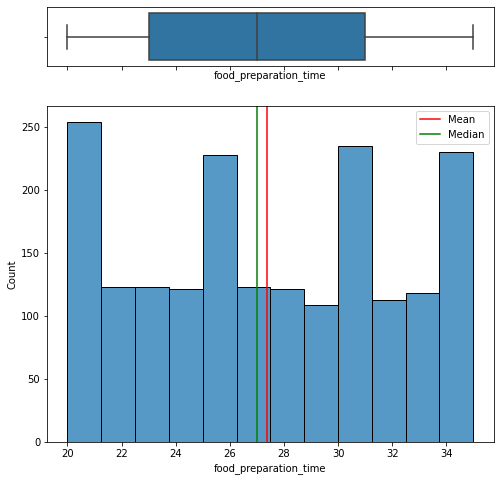

In [106]:
f, (ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(8,8))
sns.histplot(data=df,x='food_preparation_time',stat='count',ax=ax_hist)
plt.axvline(x=df.food_preparation_time.mean(),color='r',label="Mean")
plt.axvline(x=df.food_preparation_time.median(),color='g',label="Median")
plt.legend(loc = 'upper right')
sns.boxplot(data=df,x='food_preparation_time',whis=True,ax=ax_box)
plt.show()

In [107]:
dffptime=df["food_preparation_time"].value_counts().sort_values(ascending=False,).rename_axis('food_preparation_time').reset_index(name='count')
print(dffptime)

    food_preparation_time  count
0                      21    135
1                      23    123
2                      27    123
3                      22    123
4                      28    121
5                      24    121
6                      20    119
7                      30    119
8                      33    118
9                      35    117
10                     31    116
11                     26    115
12                     25    113
13                     34    113
14                     32    113
15                     29    109


The distribution is no skewed but it shows 4 frequent preparation times: 21, 25, 30 and 35 minutes

**6.B delivery_time**

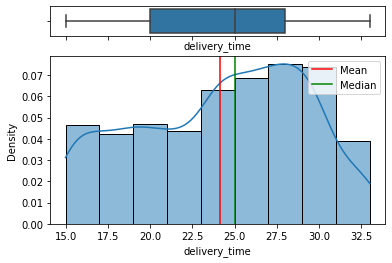

In [108]:
f, (ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.histplot(data=df,x='delivery_time',stat='density',binwidth=2,kde=True,ax=ax_hist)
plt.axvline(x=df.delivery_time.mean(),color='r',label="Mean")
plt.axvline(x=df.delivery_time.median(),color='g',label="Median")
plt.legend(loc = 'upper right')
sns.boxplot(data=df,x='delivery_time',whis=True,ax=ax_box)
plt.show()

The distribution is skewed towards left.

75% of the orders was delivered in less than 29 minutes (50% in less than 25 minutes). 

**6.C rating**

In [109]:
#Preparing rating plot
df2 = df[['rating']].copy()
df3=df2.dropna()
df2["rating"]=df2["rating"].replace(np.nan,0)
# changing the data type to int
df2["rating"]=df2["rating"].astype(int)

In [ ]:
#Left plot
nanplot=sns.histplot(data=df2.loc[df2['rating'] < 5],x='rating',stat='density',discrete=True,bins=3,label='NaN')
nanplot.patches[0].set_facecolor('red')
nanplot.patches[3].set_visible(False)
nanplot.patches[4].set_visible(False)
nanplot.get_xaxis().set_visible(False)
nanplot.get_yaxis().set_visible(False)
plt.legend(loc = 'upper center')

In [ ]:
#right plot
sns.histplot(data=df3,x='rating',stat='density',discrete=True,bins=[1,2,3,4,5])
plt.xticks(range(0,6))
plt.axvline(x=df.rating.mean(),color='r',label="Mean")
plt.axvline(x=df.rating.median(),color='g',label="Median")
plt.legend(loc = 'upper center')
plt.show()

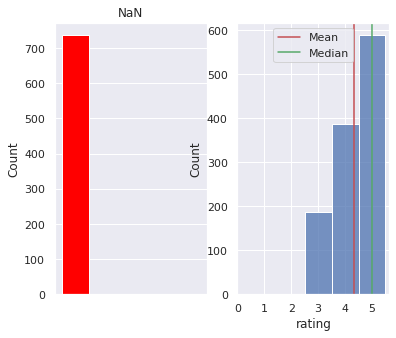

In [110]:
#set seaborn plotting
sns.set()
#define plotting region (1 row, 2 columns)
fig,axes = plt.subplots(1, 2,sharey=False,figsize=(6,5))
nanplot=sns.histplot(data=df2.loc[df2['rating'] < 5],x='rating',stat='count',discrete=True,bins=3,ax=axes[0])
nanplot.set_title('NaN')
nanplot.patches[0].set_facecolor('red')
nanplot.patches[3].set_visible(False)
nanplot.patches[4].set_visible(False)
nanplot.set_xticks(range(0))
nanplot.set(xlabel=None)
histograma=sns.histplot(data=df3,x='rating',stat='count',discrete=True,bins=[1,2,3,4,5],ax=axes[1])
plt.xticks(range(0,6))
plt.axvline(x=df.rating.mean(),color='r',label="Mean")
plt.axvline(x=df.rating.median(),color='g',label="Median")
plt.legend(loc = 'upper center')
plt.show()

The rating distribution is strongly skewed towards left.

Customers rated their orders between 3 and 5, but there was 736 orders not rated.

The amount of not rated orders is similar to the orders rated as 5

**6.D cost_of_the_order**

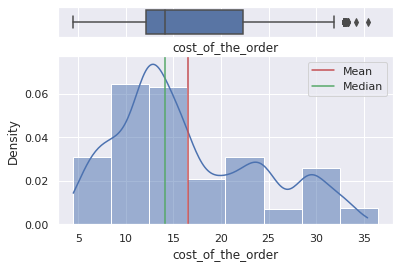

In [111]:
f, (ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.histplot(data=df,x='cost_of_the_order',stat='density',binwidth=4,kde=True,ax=ax_hist)
plt.axvline(x=df.cost_of_the_order.mean(),color='r',label="Mean")
plt.axvline(x=df.cost_of_the_order.median(),color='g',label="Median")
plt.legend(loc = 'upper right')
sns.boxplot(data=df,x='cost_of_the_order',whis=True,ax=ax_box)
plt.show()

The distribution is skewed towards right.

75% of the orders cost less than $25.

50% of the orders cost less than $15.

Orders over $30 was exceptional (outliers).

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
dfrest=df['restaurant_name'].value_counts().sort_values(ascending=False,).rename_axis('restaurant_name').reset_index(name='orders')
print(dfrest)

               restaurant_name  orders
0                  Shake Shack     219
1            The Meatball Shop     132
2            Blue Ribbon Sushi     119
3    Blue Ribbon Fried Chicken      96
4                         Parm      68
..                         ...     ...
173             Coppola's East       1
174    Kori Restaurant and Bar       1
175                   Woorijip       1
176          Crema Restaurante       1
177                 'wichcraft       1

[178 rows x 2 columns]


#### Observations:

Top 5 restaurants:

1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
dfcuiswkend=df.value_counts(["cuisine_type", "day_of_the_week"]).sort_values(ascending=False).reset_index(name='orders')
print(dfcuiswkend)

      cuisine_type day_of_the_week  orders
0         American         Weekend     415
1         Japanese         Weekend     335
2          Italian         Weekend     207
3         American         Weekday     169
4          Chinese         Weekend     163
5         Japanese         Weekday     135
6          Italian         Weekday      91
7          Mexican         Weekend      53
8          Chinese         Weekday      52
9           Indian         Weekend      49
10  Middle Eastern         Weekend      32
11   Mediterranean         Weekend      32
12         Mexican         Weekday      24
13          Indian         Weekday      24
14  Middle Eastern         Weekday      17
15            Thai         Weekend      15
16   Mediterranean         Weekday      14
17          French         Weekend      13
18          Korean         Weekend      11
19        Southern         Weekend      11
20         Spanish         Weekend      11
21        Southern         Weekday       6
22         

#### Observations:

Most popular cuisine on weekends: American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

#### Observations:

25% of the orders costed more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:

Orders had an average delivery time of 24.161749 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Most frequent customers
dfcustom=df.value_counts(["customer_id"]).sort_values(ascending=False).reset_index(name='orders')
print(dfcustom)

      customer_id  orders
0           52832      13
1           47440      10
2           83287       9
3          250494       8
4           65009       7
...           ...     ...
1195       372276       1
1196       371806       1
1197       371677       1
1198       264399       1
1199       405334       1

[1200 rows x 2 columns]


In [ ]:
#Orders id of this customers
dfcustord=df.loc[df['customer_id'] == 52832,['customer_id','order_id']]
dfcustord=dfcustord.append((df.loc[df['customer_id'] == 47440,['customer_id','order_id']]), ignore_index = True)
dfcustord=dfcustord.append((df.loc[df['customer_id'] == 83287,['customer_id','order_id']]), ignore_index = True)
print(dfcustord)

    customer_id  order_id
0         52832   1478179
1         52832   1477314
2         52832   1476916
3         52832   1478160
4         52832   1478265
5         52832   1477302
6         52832   1477041
7         52832   1477013
8         52832   1476828
9         52832   1478245
10        52832   1477129
11        52832   1477179
12        52832   1477075
13        47440   1477909
14        47440   1478120
15        47440   1477178
16        47440   1476982
17        47440   1477481
18        47440   1477594
19        47440   1476854
20        47440   1476559
21        47440   1477903
22        47440   1477664
23        83287   1476564
24        83287   1476673
25        83287   1476767
26        83287   1477453
27        83287   1478193
28        83287   1476812
29        83287   1477358
30        83287   1477258
31        83287   1477628


#### Observations

3 most frequent customers Id:

1.   52832 13 orders
2.   47440 10 orders
3.   83287  9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


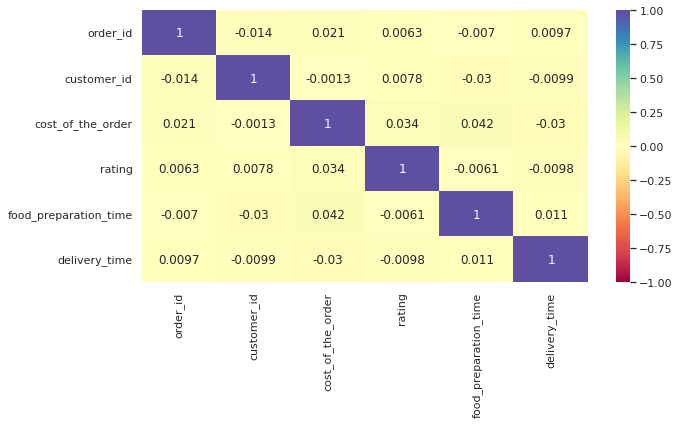

In [112]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

No correlation between variables.

In [29]:
dforders=df["customer_id"].value_counts().sort_values(ascending=False,).rename_axis('customer_id').reset_index(name='orders')
dffoodptime=df.groupby(['customer_id'])['food_preparation_time'].mean().rename_axis('customer_id').reset_index(name='food_preparation_time_Mean')
dfdelitime=df.groupby(['customer_id'])['delivery_time'].mean().rename_axis('customer_id').reset_index(name='delivery_time_Mean')
dfordercost=df.groupby(['customer_id'])['cost_of_the_order'].mean().rename_axis('customer_id').reset_index(name='cost_of_the_order_Mean')
jcolumn=dffoodptime['food_preparation_time_Mean']
dfbyorders=dforders.join(jcolumn)
jcolumn=dfdelitime['delivery_time_Mean']
dfbyorders=dfbyorders.join(jcolumn)
jcolumn=dfordercost['cost_of_the_order_Mean']
dfbyorders=dfbyorders.join(jcolumn)
print(dfbyorders)

      customer_id  orders  food_preparation_time_Mean  delivery_time_Mean  \
0           52832      13                        22.0                26.0   
1           47440      10                        28.0                22.0   
2           83287       9                        22.0                29.0   
3          250494       8                        29.0                32.0   
4          259341       7                        27.5                31.0   
...           ...     ...                         ...                 ...   
1195       335897       1                        32.0                25.0   
1196       377481       1                        31.0                32.0   
1197       125542       1                        25.0                32.0   
1198       288808       1                        28.0                28.0   
1199       397537       1                        26.0                16.0   

      cost_of_the_order_Mean  
0                     16.100  
1            

When we setup the dataframe to search for relations between the variables and the amount of orders made by customers:

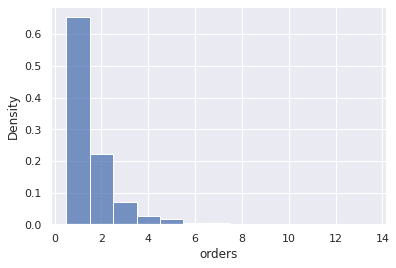

In [113]:
sns.histplot(data=dfbyorders,x='orders',stat='density',discrete=True)
plt.show()

Orders distribution is strongly skewed towards right.

Most of the customers has made only one order.

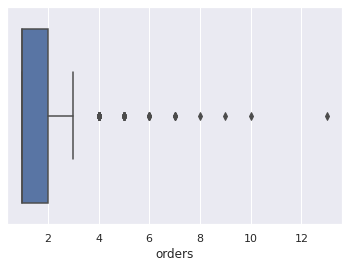

In [114]:
sns.boxplot(data=dfbyorders,x='orders',whis=True)
plt.show()

75% of the customers has made less than 3 orders.

More than 4 orders are strange.

In [115]:
dfbyorders['orders'].describe().reset_index(name='orders')

,index,orders
0,count,1200.000000
1,mean,1.581667
2,std,1.090560
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,2.000000
7,max,13.000000


Customers has made 1.581667 orders in average

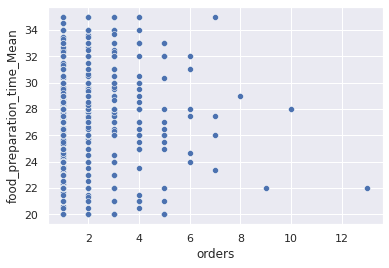

In [116]:
sns.scatterplot(x="orders", y="food_preparation_time_Mean", data=dfbyorders)
plt.show()

Customers who has made more than 6 orders, show some preference for some food preparation times.

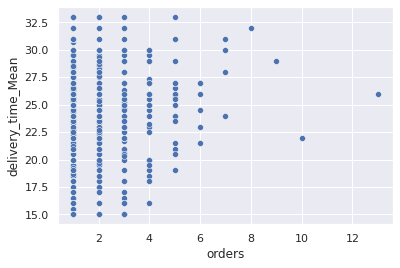

In [117]:
sns.scatterplot(x="orders", y="delivery_time_Mean", data=dfbyorders)
plt.show()

Customers who has made more than 6 orders, show some preference for some delivery times.

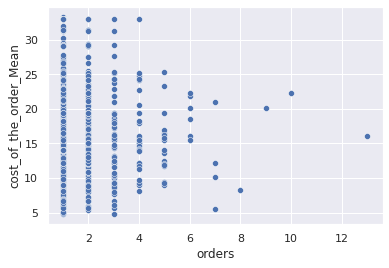

In [118]:
sns.scatterplot(x="orders", y="cost_of_the_order_Mean", data=dfbyorders)
plt.show()

Customers who has made more than 5 orders, show some preference for some costs of the order.

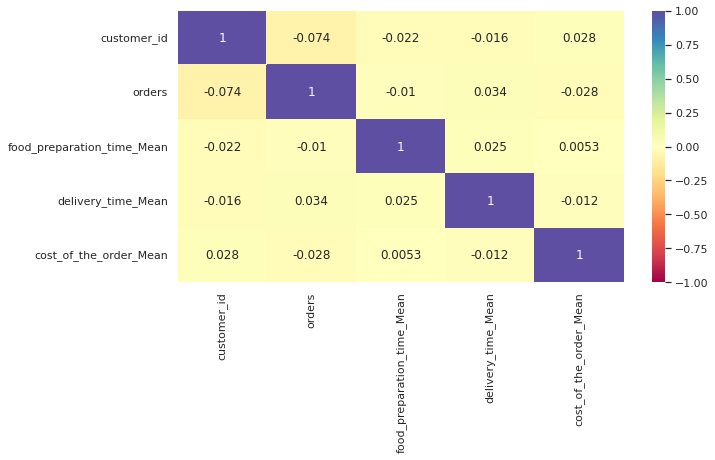

In [119]:
plt.figure(figsize=(10,5))
sns.heatmap(dfbyorders.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Orders don't show any correlation to other variables.

In [39]:
df3bestcust=df.loc[df['customer_id'] == 52832,['customer_id','cuisine_type']]
df3bestcust=df3bestcust.append((df.loc[df['customer_id'] == 47440,['customer_id','cuisine_type']]), ignore_index = True)
df3bestcust=df3bestcust.append((df.loc[df['customer_id'] == 83287,['customer_id','cuisine_type']]), ignore_index = True)
df3bestcust=df3bestcust.value_counts(["cuisine_type"]).sort_values(ascending=False).rename_axis('cuisine_type').reset_index(name='count')
print(df3bestcust)

     cuisine_type  count
0        American     15
1        Japanese      7
2         Chinese      2
3          Indian      2
4  Middle Eastern      2
5          French      1
6          Korean      1
7         Mexican      1
8         Spanish      1


In [40]:
dfbadcust=df.drop(df[df.customer_id == 52832].index)
dfbadcust=df.drop(df[df.customer_id == 47440].index)
dfbadcust=df.drop(df[df.customer_id == 83287].index)
dfbadcust=dfbadcust.value_counts(["cuisine_type"]).sort_values(ascending=False).rename_axis('cuisine_type').reset_index(name='count')
print(dfbadcust)

      cuisine_type  count
0         American    580
1         Japanese    466
2          Italian    298
3          Chinese    215
4          Mexican     77
5           Indian     73
6   Middle Eastern     49
7    Mediterranean     46
8             Thai     19
9           French     18
10        Southern     17
11          Korean     13
12         Spanish     11
13      Vietnamese      7


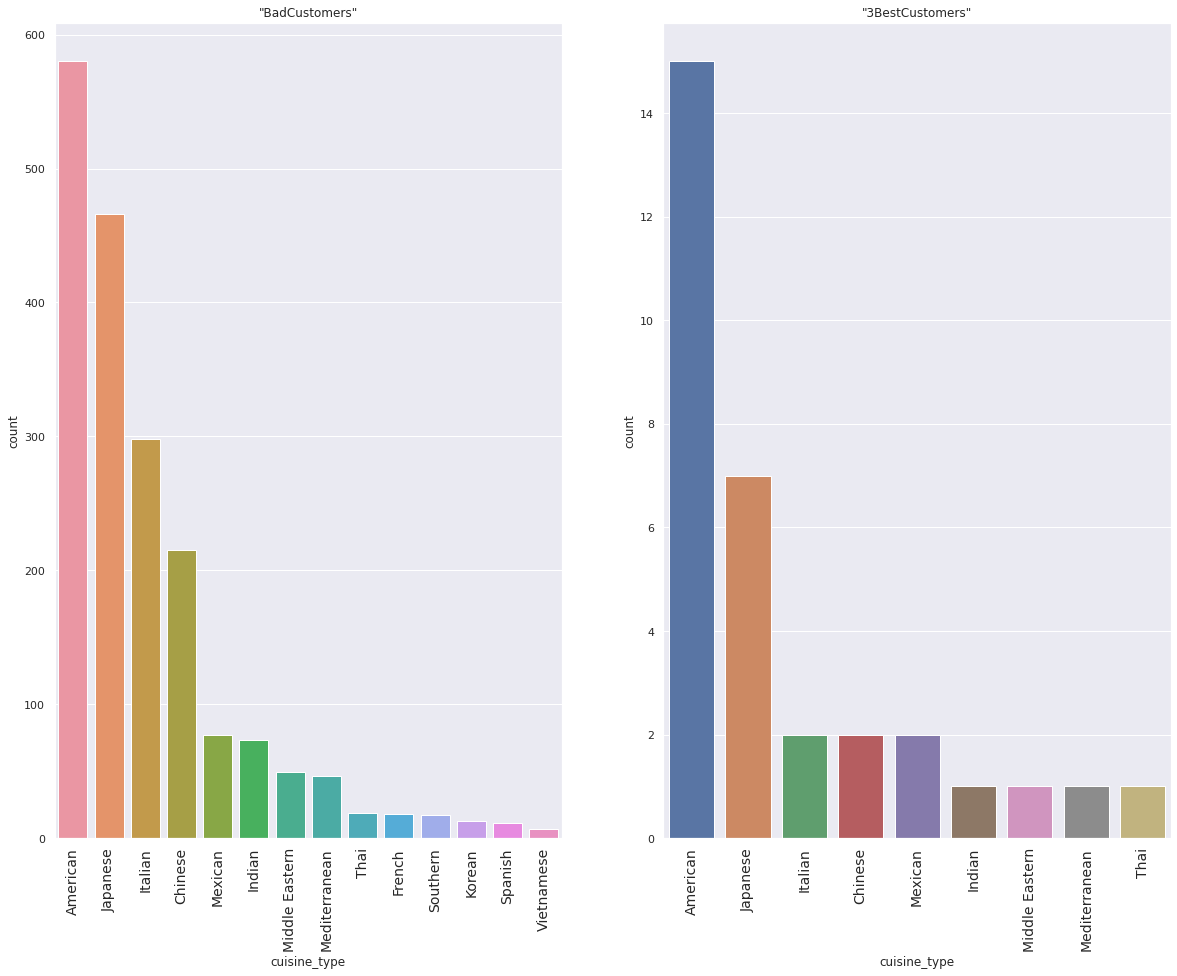

In [120]:
fig,axes = plt.subplots(1, 2,sharey=False,figsize=(20,15))
badplot=sns.barplot(data=dfbadcust,x='cuisine_type',y='count',ax=axes[0])
badplot.set_title('"BadCustomers"')
badplot.set_xticklabels(badplot.get_xticklabels(),rotation=90,size=14)
bestplot=sns.barplot(data=df3bestcust,x='cuisine_type',y='count',ax=axes[1])
bestplot.set_title('"3BestCustomers"')
bestplot.set_xticklabels(badplot.get_xticklabels(),rotation=90,size=14)
plt.show()

"BadCustomers" and "GoodCustomers" seems to show the same cuisine preferences.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
dfrestrate=df.groupby('rating')['restaurant_name'].value_counts().sort_values(ascending=False).reset_index(name='count')
dfrestrate=dfrestrate.loc[dfrestrate['count'] >= 50,['rating','restaurant_name','count']]
dfrestratemean=df.groupby(['restaurant_name'])['rating'].mean().rename_axis('restaurant_name').reset_index(name='rating_Mean')
dfrestratemean1=dfrestratemean.loc[dfrestratemean['restaurant_name'] == "Shake Shack",['restaurant_name','rating_Mean']]
dfrestratemean2=dfrestratemean.loc[dfrestratemean['restaurant_name'] == "The Meatball Shop",['restaurant_name','rating_Mean']]
print(dfrestrate)
print(" ")
print(dfrestratemean1)
print(" ")
print(dfrestratemean2)

   rating    restaurant_name  count
0     5.0        Shake Shack     60
1     5.0  The Meatball Shop     53
2     4.0        Shake Shack     50
 
    restaurant_name  rating_Mean
136     Shake Shack     4.278195
 
       restaurant_name  rating_Mean
153  The Meatball Shop     4.511905


#### Observations:

the most rated restaurants are:

1.   Shake Shack        rated 110 times -- Mean rate: 4.27895
2.   The Mearball Shop  rated  53 times -- Mean rate: 4.511905



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
df5_20=df.loc[((df['cost_of_the_order'] >= 5) & (df['cost_of_the_order'] <= 20)),['cost_of_the_order']]
df5_20=(df5_20*0.15).sum()
df20=df.loc[df['cost_of_the_order'] > 20,['cost_of_the_order']]
df20=(df20*0.25).sum()
nrevenue=df5_20+df20
print(df5_20)
print(df20)
print(nrevenue)

cost_of_the_order    2477.5755
dtype: float64
cost_of_the_order    3688.7275
dtype: float64
cost_of_the_order    6166.303
dtype: float64


#### Observations:

net revenue = $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [94]:
dftt=df[['food_preparation_time','delivery_time']]
dftt['total_time']=dftt['food_preparation_time']+dftt['delivery_time']
trows=dftt.shape[0]
dftt=dftt.loc[dftt['total_time'] > 60]
trows60=dftt.shape[0]
percentage=(trows60*100)/trows
print("percentage = ",percentage,"%")
print(" ")
print(dftt)

percentage =  10.53740779768177 %
 
      food_preparation_time  delivery_time  total_time
7                        33             30          63
10                       34             28          62
19                       35             26          61
24                       32             29          61
54                       35             29          64
...                     ...            ...         ...
1869                     35             26          61
1873                     35             28          63
1875                     32             33          65
1880                     35             27          62
1889                     33             30          63

[200 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Observations:

Percentage orders taking more than 60 minutes to get delivered =  10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [103]:
dfdt=df.groupby(['day_of_the_week'])['delivery_time'].mean().rename_axis('day_of_the_week').reset_index(name='delivery_Mean')
print(dfdt)

  day_of_the_week  delivery_Mean
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:

Mean delivery_time:

1.   Weekday: 28.340037
2.   Weekend: 22.470022


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   1200 customers
*   1898 orders
*   736 not rated and 1162 rated orders
*   Most of the customers has made only one order.
*   75% of the customers has made less than 3 orders.
*   More than 4 orders is rare.
*   Customers has made 1.6 orders in average
*   Orders don't show any correlation to other variables.
*   Customers who has made more than 6 orders, show some preference for some delivery times, food_preparation_times and cost_of_the_order.
*   "BadCustomers" and "GoodCustomers" seems to show the same cuisine preferences.

### Recommendations:

*  Describe characteristics of customers with more than 6 orders.
*  Search for customers who have this characteristics.
*  Add some other variables to the analysis (address, occupation, education...).
*  Evaluate app and advertisement.

---